#Multiple Linear Regression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
#Nama data frame kita adalah df yang berisi data dari kc_house _Data.csv
#Features yang digunakan adalah 'bedroms','bathrooms',saft_living',dan 'yr built'
df = pd.read_csv('/content/drive/MyDrive/Pembelajaran Mesin/Praktikum/Praktikum 5/kc_house_data.csv',
                 usecols=['bedrooms','bathrooms','sqft_living','grade','price','yr_built'])

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [6]:
df.shape

(21613, 6)

In [7]:
df.info

<bound method DataFrame.info of           price  bedrooms  bathrooms  sqft_living  grade  yr_built
0      221900.0         3       1.00         1180      7      1955
1      538000.0         3       2.25         2570      7      1951
2      180000.0         2       1.00          770      6      1933
3      604000.0         4       3.00         1960      7      1965
4      510000.0         3       2.00         1680      8      1987
...         ...       ...        ...          ...    ...       ...
21608  360000.0         3       2.50         1530      8      2009
21609  400000.0         4       2.50         2310      8      2014
21610  402101.0         2       0.75         1020      7      2009
21611  400000.0         3       2.50         1600      8      2004
21612  325000.0         2       0.75         1020      7      2008

[21613 rows x 6 columns]>

In [8]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [9]:
#Mrubah tipe data dari bathrooms yang semula float menjadi int
df['bathrooms']= df['bathrooms'].astype('int')

In [10]:
#Mengganti nilai 33 menjadi 3
df['bedrooms']= df['bedrooms'].replace(33,3)

#Handling Missing Values

In [11]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

#Exploratory Data Analysis (EDA)

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


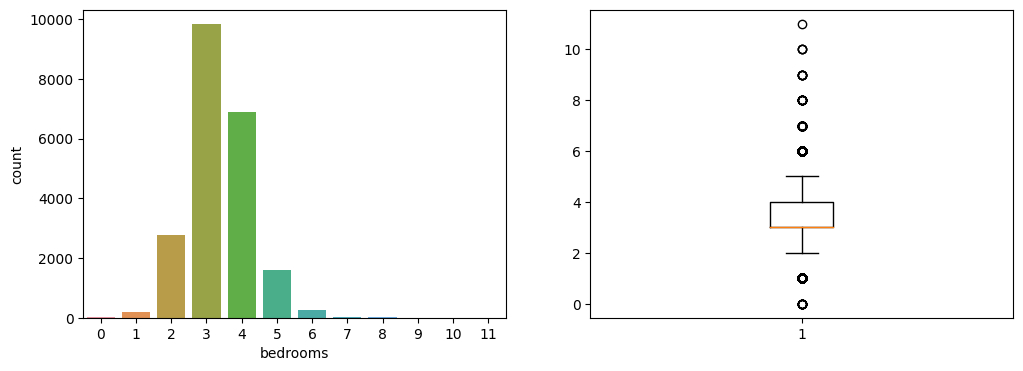

In [43]:
#Univariate analysis bedrooms
#Melihat distribusi dari bedrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()

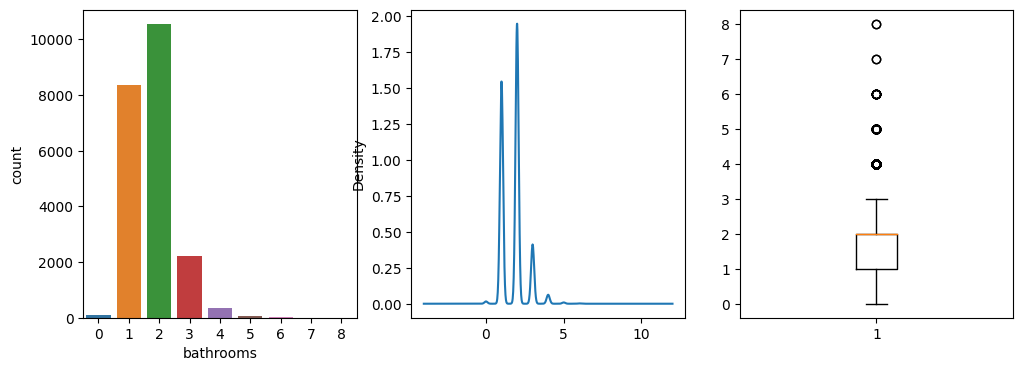

In [14]:
#Univariate analysis bathrooms
#Melihat distribusi dari bathrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,3,1)
sns.countplot(x=df['bathrooms'])

f.add_subplot(1,3,2)
df['bathrooms'].plot(kind ='kde')

f.add_subplot(1,3,3)
plt.boxplot(x=df['bathrooms'])
plt.show()

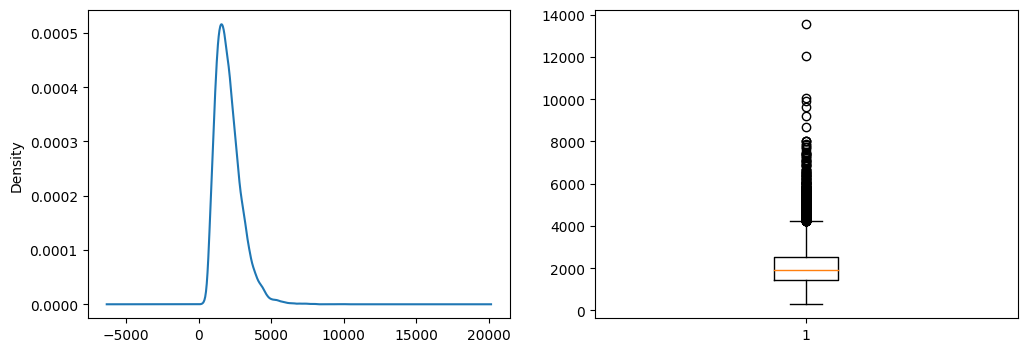

In [15]:
#Univariate analysis sqft_living
#Melihat distribusi dari sqft_living
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sqft_living'].plot(kind = 'kde')

f.add_subplot(1,2,2)
plt.boxplot(df['sqft_living'])
plt.show()

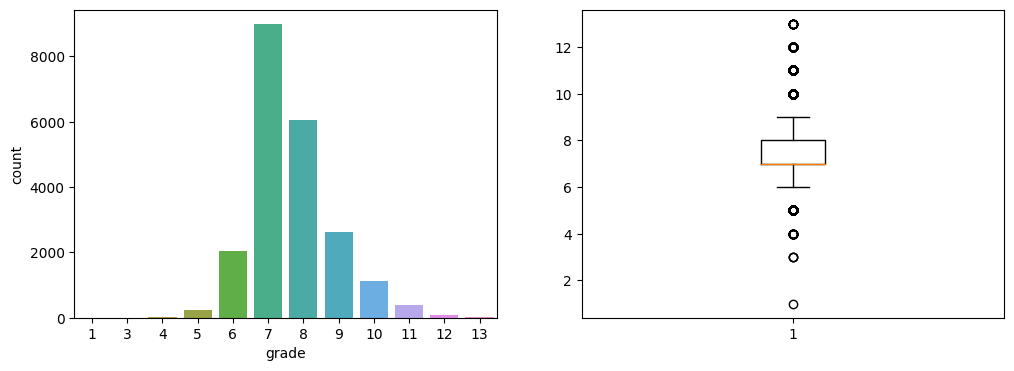

In [16]:
#Univariate analysis grade
#Melihat distribusi dari grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['grade'])

f.add_subplot(1,2,2)
plt.boxplot(x=df['grade'])
plt.show()

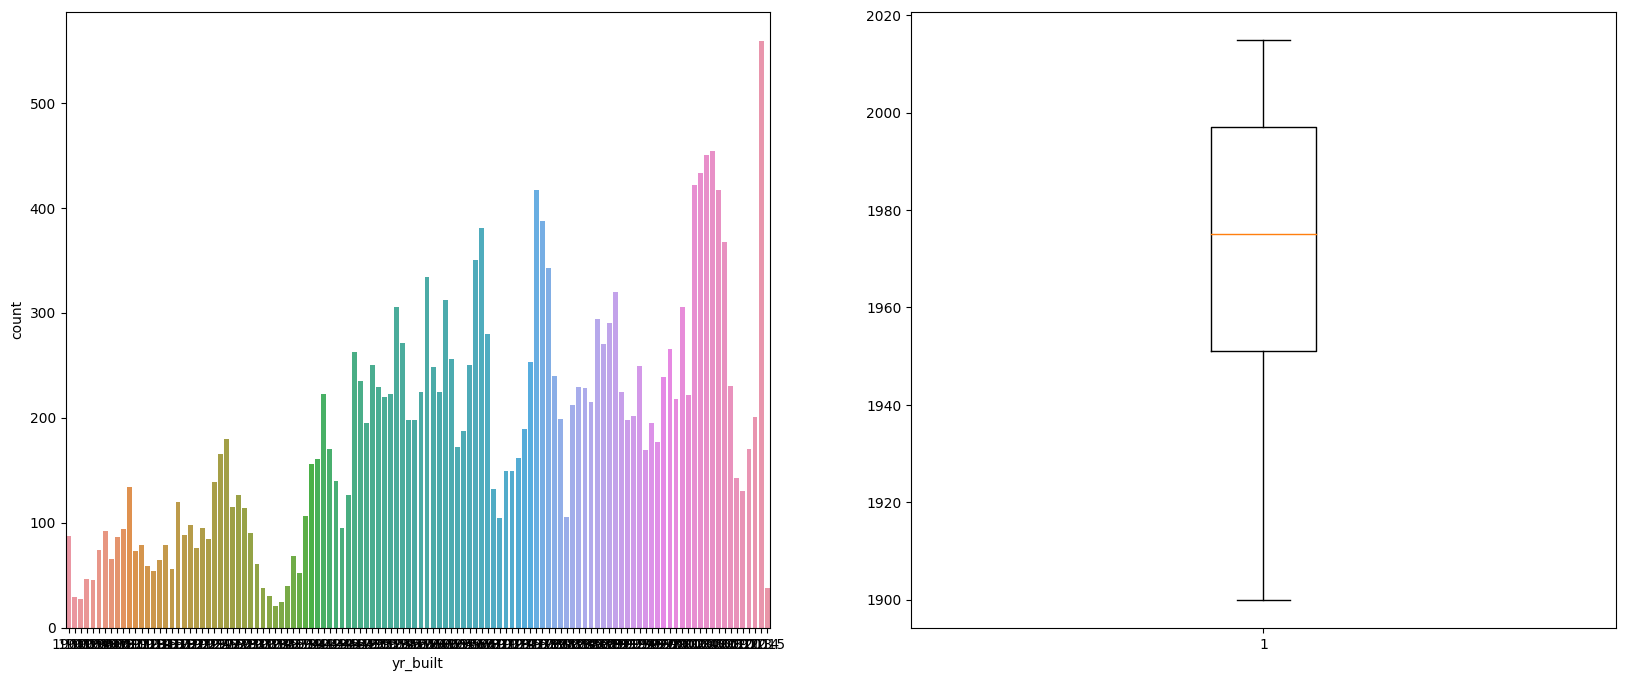

In [17]:
#Univariate analysis yr_built
#Melihat distribusi dari yr_built
f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(x=df['yr_built'])

f.add_subplot(1,2,2)
plt.boxplot(x=df['yr_built'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

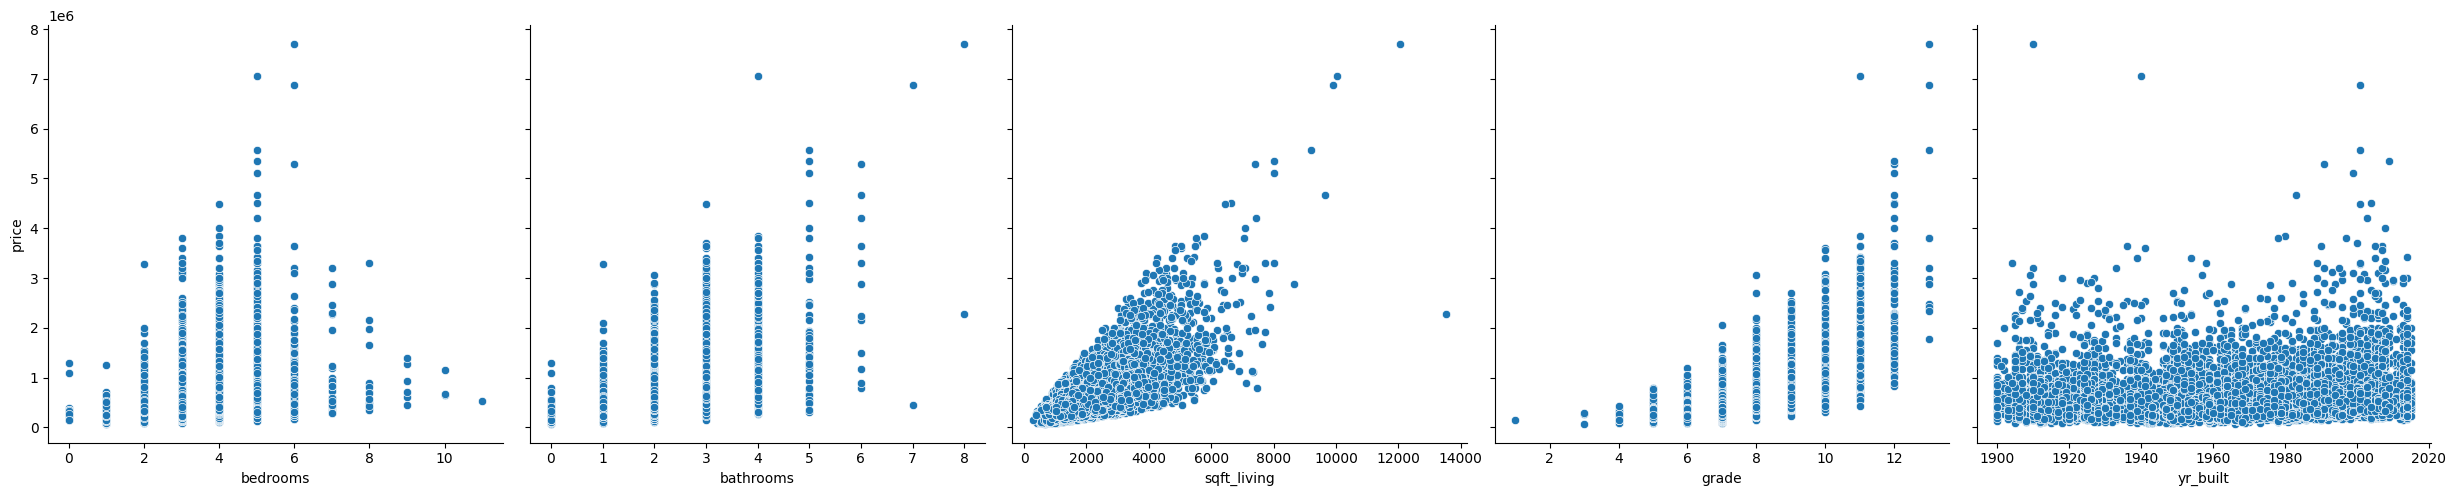

In [18]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms','bathrooms','sqft_living','grade','yr_built'],y_vars=['price'],size=5)
plt.show()

In [19]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable
df.corr().style.background_gradient().set_precision(2)

<ipython-input-19-c260062506fc>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00


#Modelling

In [20]:
#Recall data kita
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [21]:
#Pertama, buat variabel X dan Y
x = df.drop(columns='price')
y = df['price'] 

In [22]:
#Kedua, kita split data kita menjadi training dan testing porsi 80:20
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=4)

In [23]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 5)
(17290,)
(4323, 5)
(4323,)


In [24]:
#Ketiga, buat object linear regresi
lin_reg = LinearRegression()

In [44]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [45]:
LinearRegression()

LinearRegression()

In [26]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-53061.75464279  64658.55790617    188.90926343 131290.89536823
  -3969.55831454]
7031568.245717696


In [27]:
#Buat kedalam dataframe agar kebih rapi
coef_dict ={'features': x.columns,
            'coef_value':lin_reg.coef_}

coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef


,features,coef_value
0,bedrooms,-53061.754643
1,bathrooms,64658.557906
2,sqft_living,188.909263
3,grade,131290.895368
4,yr_built,-3969.558315


In [28]:
y_pred = lin_reg.predict(x_test)

In [29]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.61251132869411

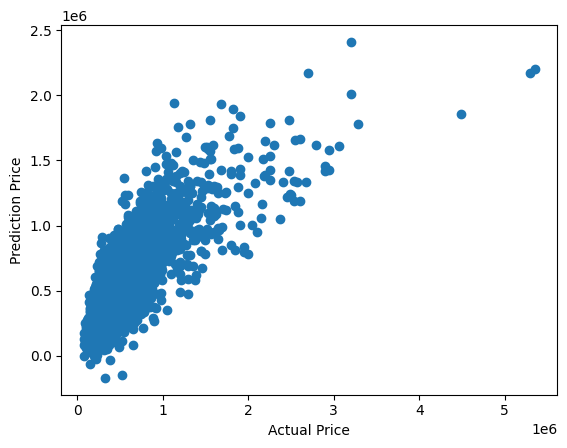

In [30]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(y_test, y_prediksi)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.show()

#Prediction

In [31]:
#Prediksi harga rumah idaman
lin_reg.predict([[3,2,1800,7,1990]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([361351.99342265])

In [32]:
#Pertama, buat variabel X dan Y
x = df.drop(columns='yr_built')
y = df['yr_built'] 

In [33]:
#Kedua, split data menjadi training dan testing porsi 80:20
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=4)

In [34]:
#Cek shape dari data training dan testing

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 5)
(17290,)
(4323, 5)
(4323,)

(17290, 5)
(17290,)
(4323, 5)
(4323,)


(4323,)

In [35]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [36]:
#Keempat,train the model menggunakan training data yang udah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

LinearRegression()

In [37]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-4.08785294e-05 -2.92914027e+00  1.44392177e+01  1.42209727e-03
  1.42010043e+01]
1865.9301689125177


In [38]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict ={'features': x.columns,
            'coef_value':lin_reg.coef_}

coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,price,-0.000041
1,bedrooms,-2.929140
2,bathrooms,14.439218
3,sqft_living,0.001422
4,grade,14.201004


In [39]:
y_pred = lin_reg.predict(x_test)

In [40]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.39306117176747213

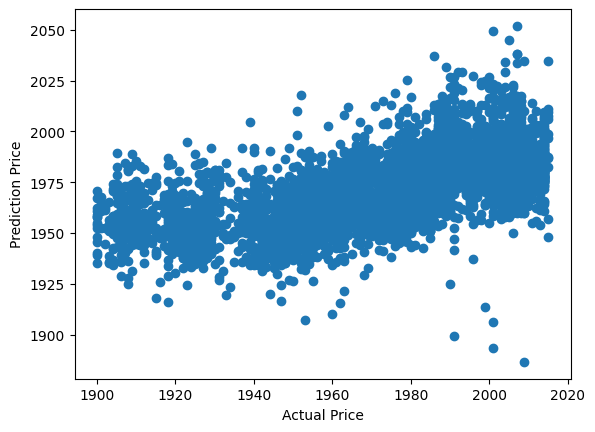

In [41]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(y_test, y_prediksi)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.show()

In [42]:
#Prediksi harga rumah idaman
lin_reg.predict([[3,2,1800,7,1990]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([56110.67219038])